# Inputs to bolo-calc/jbolo
This notebook documents where we got the various numbers that are used as inputs to bolo-calc for runs in this directory.

# Mirrors

- Panel gaps are < 0.5% per mirror for the CHLAT (stated in PBDR, for SO and CCAT-prime).  
  - We use 0.4% and call it "spillover"
  
- Some power comes out of the cryostat window at wide angles, due to scattering of elements inside the optics tube.  Act had this at 3%, SPT believes it's more like 1%.
  - We set it to 2% here for the mirror closest to the cryostat, and call it spillover, and add to the panel gap term for the CHLATs making 2.4% total for that mirror.

- The mirrors have a Ruze scattering loss due to small scale rms of the surface finish of the mirrors (or panels).  
  - We set the surface roughness to 4 microns rms and let bolo-calc do the calculation.
  
- The mirrors have an absorption loss due to finite conductivity.  
  - We assign the mirrors the conductivity of bulk aluminum, and let bolo-calc do the calculation.

## Optics:  Dielectric losses

Loss tangents:
- Alumina:  
    - Using tan$\delta$ = 3E-4 
    - 3E-4 (+- 1E-4) is value at 77K, from SPT3g, Nadolski etal, https://arxiv.org/abs/1912.04272 table 1.
- Silicon:  
    - Using Czochralski process silicon, which has some impurities.
    - Using tan$\delta$ = 5.0E-5
    - Dutta etal, https://arxiv.org/pdf/1307.4715.pdf , gives an upper limit of 8e-5 at and below 30K for the worse (lower Ohm-cm) of their two samples.  So, 8e-5 would be very very conservative;  5e-5 is probably conservative as well.  McMahon suspects 1E-5, but no measurements back that up.
 
- HDPE:  
    - At ~4K (lenses), I have been using tan$\delta$ = 0.8E-4, but I don't know the source of this.  I'm changing it to 1.0E-4.
    - At ~300K (the window, really UHMWPE), we have been using 2E-4, which is the number Brad Benson uses (citing Lamb) for SPT3g.  However, Lamb does not have specific entries for UHMWPE.  His numbers for HDPE range from 2.1 to 3.9 in our frequency range, so I am going to change this to 3E-4 for the window.
    - Window has been set to 273K;  I'm setting it to 250K at Pole for SPLAT and SAT.
    - The LAT windows have been set to 3mm ~ 1/8".  I'm setting them now to 4.75mm ~ 3/16", because that is what the engineers say we need for safety.

<BR>

Nylon loss:
- Using an absorption model with transmission $ T \propto e^{-\alpha z}$, with $\alpha = a \nu^b$.  See discussion and vectors of values for each telescope below.
    
<BR>
        
RTMLI loss:
- Motivated by fits to various data sets, we build a model of the same form as for Nylon, with transmission $ T \propto e^{-\alpha z}$, with $\alpha = a \nu^b$ above 220GHz, and $\alpha = $constant below 220GHz.  See discussion and vectors of values (for the scattering fraction, or absorption) for each telescope below.


<hr style="border:2px solid black"> </hr>

# Nylon filter 
Until recently this was specified in the yaml files for use only in the SAT model, but talking to Brad recently we've decided to add it to the LAT model as well.

Specified in PBDR SAT section as 7.5mm thick for all bands.

We use two data inputs for this model:
- Halpern, Gush, Wishnow and de Cosmo, https://www.osapublishing.org/ao/abstract.cfm?uri=ao-25-4-565
    - They fit absorption to a model with transmission $ T \propto e^{-\alpha z}$, with $\alpha = a \nu^b$.
    
    - They find alpha goes as $\nu^{2.9}$ rather than the $\nu^1$ expected for a loss tangent model.   A footnote in their paper says their $a$ and $b$ for nylon are not precise, but should only be used as "guides".
    
- The Spider group did a run with a 1" thick nylon filter (rather than the usual 3/32") and found the 280GHz in-band optical efficiency went down by about 30%.  Using the $a$ from Halpern etal and adjusting $b$ to (roughly) agree with this measurement gives $b = 2.6$.  (We could have adjusted $a$ instead, or both.  Changing only $b$ maximizes the loss at the lower frequencies, consistent with Lorenzo's measurement at 220/280).  We proceed with this value of $b$, understanding that this is not a great constraint and needs better data.  

Next, we print out the nylon filter "emissivities" for each telescope, each frequency band, in a format that is convenient for cutting and pasting into a yaml file.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 8]

sat_nus =   np.array([      25.75, 38.75, 85.0, 95.0, 145.0, 155.0, 227.0, 285.5])
splat_nus = np.array([20.0, 25.75, 38.75, 91.5, 148.5,              227.0, 285.5])
chlat_nus = np.array([      25.75, 38.75, 91.5, 148.5,              227.0, 285.5])

telescopes =['SAT', 'SPLAT','CHLAT']
nu_dict = {'SAT':sat_nus, 'SPLAT':splat_nus, 'CHLAT':chlat_nus}

# From Halpern etal
a_nylon = 5e-4
b_nylon = 2.6   # Halpern says 2.9, we renormalize to Spider and get 2.6.
delta_z = 0.75 #cm
#delta_z = 2.30 #cm  (Use to check Spider 0.33 abs at 280GHz)

# We're going to print this in a format that makes it easy to cut and paste into a yaml file.
for tel in telescopes:
    print(tel)
    
    np.set_printoptions(precision=2)
    print('nu (GHz) = ',end='')
    print(repr(nu_dict[tel]))

    abs_nylon = np.array([])
    for nu in nu_dict[tel]:
        icm = nu/30.
        alpha_nylon = a_nylon*icm**b_nylon     # units are cm^-1
        transmission_nylon = np.exp(-alpha_nylon*delta_z)
        abs_nylon = np.append(abs_nylon, 1-transmission_nylon)
    
    np.set_printoptions(precision=4)
    print('abs      = ',end='')
    print('\033[91m')
    print(repr(abs_nylon))
    print('\033[0;0m')

SAT
nu (GHz) = array([ 25.75,  38.75,  85.  ,  95.  , 145.  , 155.  , 227.  , 285.5 ])
abs      = 
array([0.0003, 0.0007, 0.0056, 0.0075, 0.0223, 0.0265, 0.0698, 0.123 ])

SPLAT
nu (GHz) = array([ 20.  ,  25.75,  38.75,  91.5 , 148.5 , 227.  , 285.5 ])
abs      = 
array([0.0001, 0.0003, 0.0007, 0.0068, 0.0237, 0.0698, 0.123 ])

CHLAT
nu (GHz) = array([ 25.75,  38.75,  91.5 , 148.5 , 227.  , 285.5 ])
abs      = 
array([0.0003, 0.0007, 0.0068, 0.0237, 0.0698, 0.123 ])



<hr style="border:2px solid black"> </hr>

# RTMLI

CMB-S4 plans to use a Bicep3-like stack of thin foam filters, aka "RTMLI", to reduce infrared loading on the cryogenic stages.  Bicep3 (and in SPT3g) use a stack comprised of 10 layers of Zotefoam HD30, each 1/8" thick, spaced 1/8" apart.

- These filters are scatterers.  It is not obvious how its loss should scale with photon frequency, and there's very little data on "in-band" performance.  Loss depends on the foam type and the lamination (if any).  We use four data inputs and compare them:
    - The original RTMLI paper:  Choi etal, "Radio-transparent multi-layer insulation for radiowave receivers" https://aip.scitation.org/doi/full/10.1063/1.4827081?casa_token=MkouiPK5cEUAAAAA%3AbPgyGX5pNy3wykorW87uKVZI9FYte8MJNjd9HNqLK2D035YwkIp55Ju4ccGasmswQw2V1hd2t8o  This is for a "non-Zotefoam", but the idea is the same.
    - Measurements of various Zotefoam's (PPA30, HD30, laminated and not) transmission loss from 220-280GHz by the Caltech group.  https://docdb.cmb-s4.org/cgi-bin/private/ShowDocument?docid=761
    - Bicep3 (https://arxiv.org/abs/1808.00567) has an estimate of the loading (at 90GHz) from their RTMLI filters, though how it was arrived at is not well-described.  
    - Takahasi's thesis, https://escholarship.org/content/qt6b98h32b/qt6b98h32b.pdf , page 42 of the pdf, says that 10cm (comprised of four layers laminated together) of Zotefoam PPA30 has 1% loss at 150GHz.

The dominant loss mechanism in these filters is expected to be scattering.  Reflection is low because their effective index of refraction is very close to 1.  Bulk dielectric loss is low because they are made of low-loss plastic, and the plastic density is low.  

Our model (in bolo-calc) for this scattering filter is that it dumps the scattered power to the same temperature as the filter.  This is not obviously a very good assumption when the filter is very tranmissive, as it is in-band.  For our geometry, I think it is more likely the scattering goes to areas skyward of the filter. 

- For the SATs (or Bicep3) the power presumably falls partly at on the 250K black baffle, and partly on the ~15K sky, so our model of filter temperature ~140K (see below) is probably not terrible, in that it not far from the average of the baffle and sky.  This suggests that our use of Bicep3 below to normalize the zotefoam scattering is not subject to enormous changes from this effect.  
    
- For the LATs, we know from sidelobe studies that wide angle (eg Lambertian) scattering at the receiver window goes mostly to the cabin walls.  Much of that gets to the sky if those walls are not very absorbing.  So, in that case the foam scattering gets divided between the ambient temperature walls (10-20%) and the cold sky.  In that case the Zotefoam loading would be lower than we calculate here with bolo-calc.  
    
We will follow a two-step procedure to build a model for these filters:

- Find a reasonable model of the frequency-dependence of this filter stack.  We show that a Halpern-like model, with

$$\alpha = b \nu^a $$ 
$$T = e^{-\alpha*n_{layers}}$$

provides a good fit to both the frequency-dependent transmission curves original RTMLI paper, and to the Caltech (Defrance etal) data mentioned above.

- Test the normalization of the Defrance etal fits (of the relevant foams) against the Bicep3 and Takahashi measurements.

### Original RTMLI paper - find "b"
I used a web app to grab some data points from 

REVIEW OF SCIENTIFIC INSTRUMENTS 84, 114502 (2013) <BR>
Radio-transparent multi-layer insulation for radiowave receivers <BR>
J. Choi,H. Ishitsuka,S. Mima,S. Oguri, K. Takahashi,and O. Tajima
    
This paper uses:
- Styroace-II Styrofoam, from Dow Chemical Company.
- Each layer is 3mm thick, which I'm going to say is equivalent to the 1/8" of the HD30 layers used by SPT3g and Bicep.  From hereon, we'll talk about loss or absorption per layer, rather than per cm.
    
This is not the same foam as used by Bicep or SPT3g, but it is the only source I'm aware of of good frequency dependent transmission up to a region where transmission drops significantly.  We'll use these data to find a plausible frequency power law scaling exponent ($b$) for RTMLI.

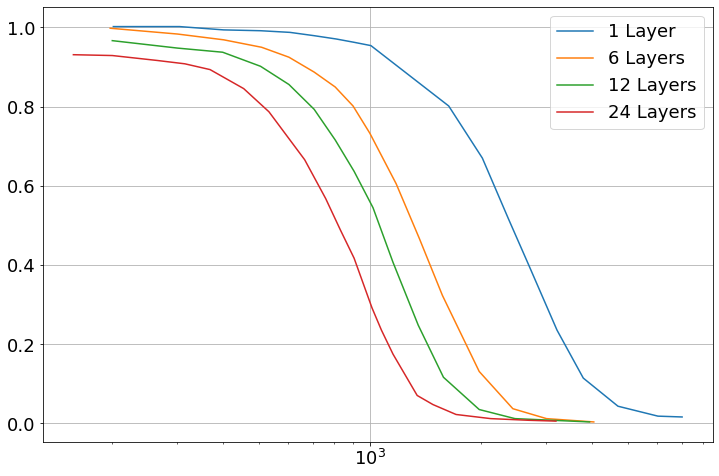

In [2]:
# Read in the data I screen-grabbed from Choi etal
nu1,rtmli_1 = np.loadtxt('rtmli_1.txt',unpack=True,delimiter=', ')
nu2,rtmli_2 = np.loadtxt('rtmli_2.txt',unpack=True,delimiter=', ')
nu3,rtmli_3 = np.loadtxt('rtmli_3.txt',unpack=True,delimiter=', ')
nu4,rtmli_4 = np.loadtxt('rtmli_4.txt',unpack=True,delimiter=', ')

# Plot it to make sure it makes sense.
plt.semilogx(nu1,rtmli_1,label='1 Layer')
plt.semilogx(nu2,rtmli_2,label='6 Layers')
plt.semilogx(nu3,rtmli_3,label='12 Layers')
plt.semilogx(nu4,rtmli_4,label='24 Layers')
plt.legend()
plt.grid()

Note that the 24 layer curve, especially, does not appear to trend toward unity at low frequencies, which is a bit disturbing.

Nevertheless, let's proceed to fit these data.

1 Layer: a = 4.44e-06, b=2.72
6 Layers: a = 3.12e-06, b=2.78
12 Layers: a = 4.00e-06, b=2.69
24 Layers: a = 9.26e-06, b=2.44


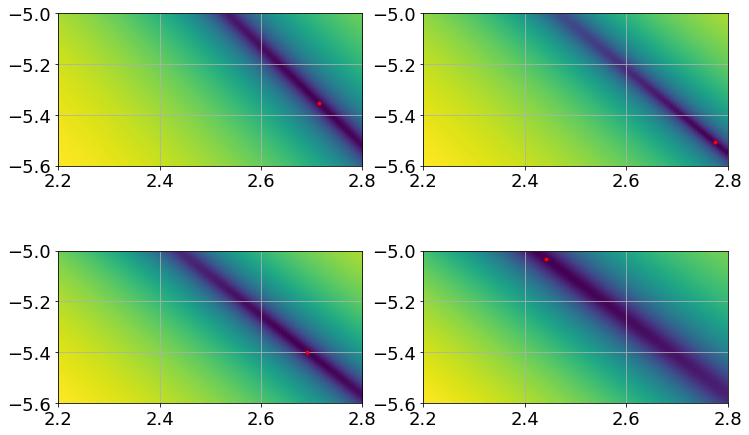

In [3]:
# In this cell we'll search a grid for the best-fit values of a and b.

# Define some functions for exploring paramter space.
def trans_dev(a,b,nlayers,data,nus):
    '''  calculate a chisquare between a model and data(nu).  
    '''
    alphaz = a*nlayers*(nus/30)**b
    T = np.exp(-alphaz)
    sumdev = np.sum((T-data)**2)
    return sumdev

def fitgoodness(nlayers,data,nus):
    '''  Over a broad grid in parameters (a,b), calculate the chisq and return an array.
         We're doing this rather than a fancy minimization because we want to see the 
         structure and compare results for different layers.
    '''
    aii = 0
    for a in avec:
        bii = 0
        for b in bvec:
            resultarr[bii,aii]=trans_dev(a,b,nlayers,data,nus)
            bii += 1
        aii += 1
    return resultarr

def minlocation(avec,bvec,resultarr):
    ''' Find the values of parameters (a,b) at the chisq minimum.
    '''
    a_ii = np.where(resultarr==np.min(resultarr))[1][0]
    a_value = avec[a_ii]
    b_ii = np.where(resultarr==np.min(resultarr))[0][0]
    b_value = bvec[b_ii]
    return a_value,b_value


# Set the ranges of (a,b) for our grid.
bmin = 2.2
bmax = 2.8
amin = -5.6
amax = -5
bvec = np.linspace(bmin,bmax,100)
avec = np.logspace(amin,amax,200)
resultarr = np.zeros((len(bvec),len(avec)))

# We'll do 4 subplots, for the 4 data sets.
fig,axs = plt.subplots(2,2)
aspects=.5  # This sets the aspect ratio of each subplot.

# 1 layer data
data = rtmli_1
nus = nu1
nlayers=1
resultarr=fitgoodness(nlayers,data,nus)
aval,bval = minlocation(avec,bvec,resultarr)
print('1 Layer: a = {0:4.2e}, b={1:3.2f}'.format(aval,bval))
#axs[0,0].contour(np.log(resultarr),origin='lower',extent=[amin,amax,bmin,bmax])
axs[0,0].imshow(np.log(resultarr).T,origin='lower',extent=[bmin,bmax,amin,amax])
axs[0,0].plot(bval,np.log10(aval),'.r')
axs[0,0].set_aspect(aspects)
axs[0,0].grid()

# 6 layer data
data = rtmli_2
nus = nu2
nlayers=6
resultarr=fitgoodness(nlayers,data,nus)
aval,bval = minlocation(avec,bvec,resultarr)
print('6 Layers: a = {0:4.2e}, b={1:3.2f}'.format(aval,bval))
#axs[0,0].contour(np.log(resultarr),origin='lower',extent=[amin,amax,bmin,bmax])
axs[0,1].imshow(np.log(resultarr).T,origin='lower',extent=[bmin,bmax,amin,amax])
axs[0,1].plot(bval,np.log10(aval),'.r')
axs[0,1].set_aspect(aspects)
axs[0,1].grid()

# 12 layer data
data = rtmli_3
nus = nu3
nlayers=12
resultarr=fitgoodness(nlayers,data,nus)
aval,bval = minlocation(avec,bvec,resultarr)
print('12 Layers: a = {0:4.2e}, b={1:3.2f}'.format(aval,bval))
#axs[0,0].contour(np.log(resultarr),origin='lower',extent=[amin,amax,bmin,bmax])
axs[1,0].imshow(np.log(resultarr).T,origin='lower',extent=[bmin,bmax,amin,amax])
axs[1,0].plot(bval,np.log10(aval),'.r')
axs[1,0].set_aspect(aspects)
axs[1,0].grid()

# 24 layer data
data = rtmli_4
nus = nu4
nlayers=24
resultarr=fitgoodness(nlayers,data,nus)
aval,bval = minlocation(avec,bvec,resultarr)
print('24 Layers: a = {0:4.2e}, b={1:3.2f}'.format(aval,bval))
#axs[1,1].contour(np.log(resultarr).T,origin='lower',extent=[bmin,bmax,amin,amax])
axs[1,1].imshow(np.log(resultarr).T,origin='lower',extent=[bmin,bmax,amin,amax])
axs[1,1].plot(bval,np.log10(aval),'.r')
axs[1,1].set_aspect(aspects)
axs[1,1].grid()


We see remarkable consistency in the best-fit values of a and b here.   The 24-layer one appears to be an outlier.
For simplicity, we're going to adopt the values for the 12-layer fit, and see what happens if we use those for all four data sets.  Now let's plot the data (for each value of N_layers) vs the model. 

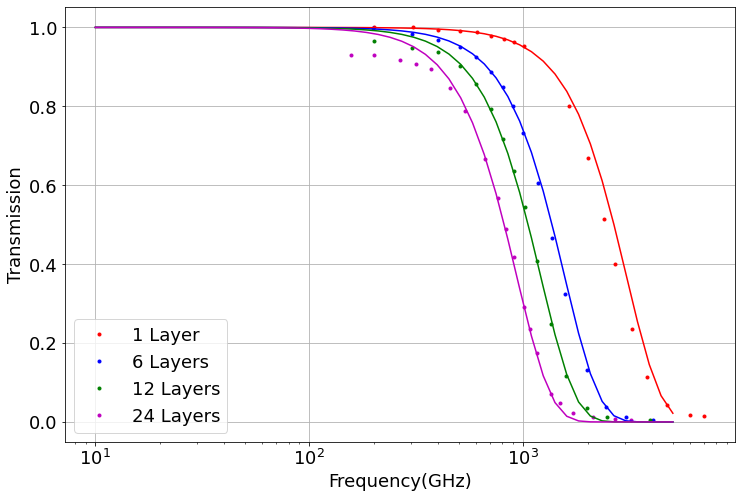

In [4]:
%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 8]

nu_ghz = np.logspace(1,3.7,50)
a = 4.00e-6
b = 2.69

# 1 layer
nlayers=1

ptype = ['.r','.b','.g','.m']
plt.semilogx(nu1,rtmli_1,ptype[0],label='1 Layer')
plt.semilogx(nu2,rtmli_2,ptype[1],label='6 Layers')
plt.semilogx(nu3,rtmli_3,ptype[2],label='12 Layers')
plt.semilogx(nu4,rtmli_4,ptype[3],label='24 Layers')
plt.legend()

ltype = ['r','b','g','m']
ii = 0
for nlayers in [1,6,12,24]:
    alphaz = a*nlayers*(nu_ghz/30)**b
    T = np.exp(-alphaz)
    plt.semilogx(nu_ghz,T,ltype[ii])
    ii = ii+1

plt.xlabel('Frequency(GHz)')
plt.ylabel('Transmission')
plt.grid()


These look pretty good, but it's clear the model doesn't match the data very well for the 12 or 24 layer curves at low frequencies. We'll proceed using b = 2.69, rounded to 2.7 , which is close to the best-fit values for the 1,6 and 12 layer fits.   

## Defrance etal data
Let's look at the Defrance etal data for HD30, which is the foam we're actually interested in.  Once again I digitized some points approximating the measured curve in a plot, using a web tool.  This sample is 125mm thick, or about 42 of the 3mm layers we're using as our standard.

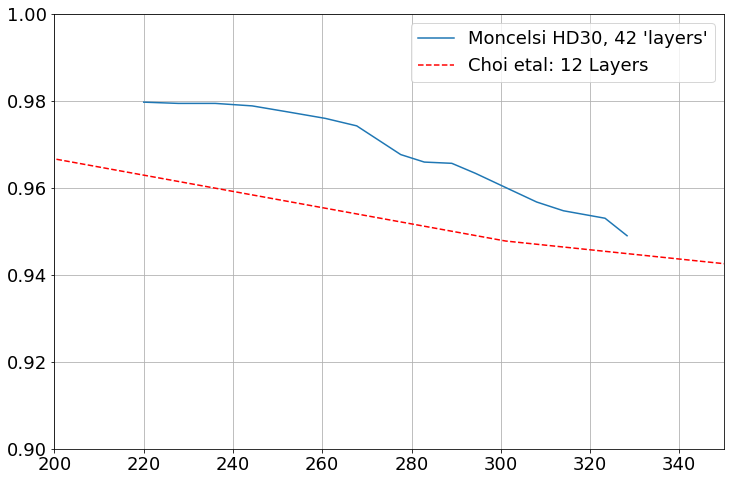

In [5]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 8]

nu5,trans_HD30 = np.loadtxt('Moncelsi_HD30_nonlaminated_trans_vs_nu.txt',unpack=True,delimiter=', ')

plt.clf()
plt.plot(nu5,trans_HD30,label='Moncelsi HD30, 42 \'layers\'')
#plt.plot(nu_ghz,abs_Nlayers,label='Bicep3 normalized: 10 layers')
plt.plot(nu3,rtmli_3,'--r',label='Choi etal: 12 Layers')
plt.legend()
plt.xlim(200,350)
plt.ylim(0.9,1)
plt.grid()

From these curves we see that the Defrance etal measurements show HD30 being better than the foam used in Choi etal, which is what we expected.

Let's now go and fit the Defrance etal data to a Halpern-like model, finding the best-fit (a,b).

1 Layer: a = 1.45e-06, b=2.82


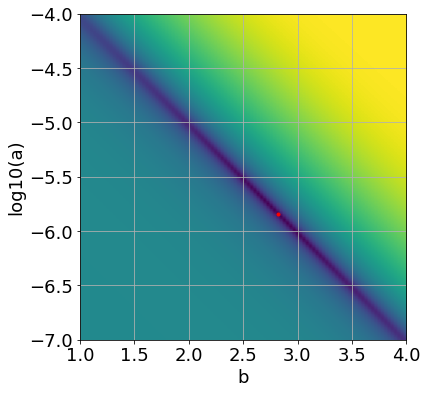

In [6]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 6]

# Set the ranges of (a,b) for our grid.
bmin = 1
bmax = 4
amin = -7
amax = -4       
bvec = np.linspace(bmin,bmax,100)
avec = np.logspace(amin,amax,200)
resultarr = np.zeros((len(bvec),len(avec)))

data = trans_HD30
nus = nu5
nlayers=42
resultarr=fitgoodness(nlayers,data,nus)
aval,bval = minlocation(avec,bvec,resultarr)
print('1 Layer: a = {0:4.2e}, b={1:3.2f}'.format(aval,bval))
#axs[0,0].contour(np.log(resultarr),origin='lower',extent=[amin,amax,bmin,bmax])
plt.imshow(np.log(resultarr).T,origin='lower',extent=[bmin,bmax,amin,amax])
plt.plot(bval,np.log10(aval),'.r')
plt.xlabel('b')
plt.ylabel('log10(a)')
plt.grid()

We note that the best fit value of $b$ is very close to that we found from the Choi etal data!   But, the normalization factor, $a$, is much lower.

Let's now plot our best-fit 42-layer model on top of the Defrance etal data, and also plot a 10-layer version of the model.

Freq = 86.44 GHz
Abs = 2.86e-04


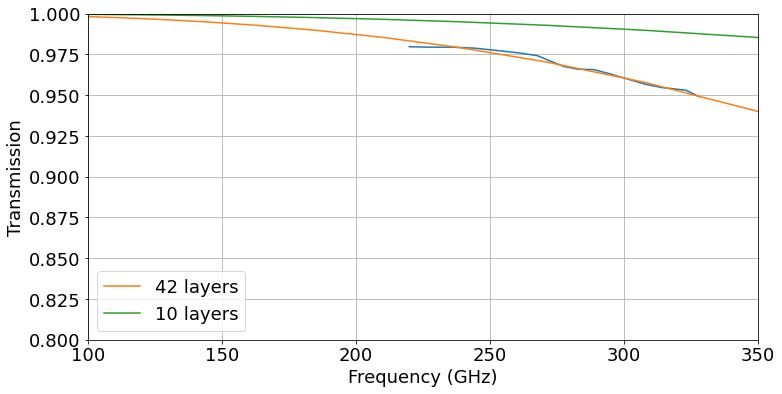

In [7]:
plt.clf()
plt.plot(nu5,trans_HD30)
plt.plot(nu_ghz,np.exp(-aval*nlayers*(nu_ghz/30)**bval), label = '42 layers')
plt.plot(nu_ghz,np.exp(-aval*10*(nu_ghz/30)**bval), label = '10 layers')
plt.legend()
plt.xlim(100,350)
plt.ylim(0.8,1)
plt.xlabel('Frequency (GHz)')
plt.ylabel('Transmission')
plt.grid()

# Print Bicep3 predicted RTMLI absorption, 10 layers.
iii = 17  # select a frequency close to 90GHz
print('Freq = {0:4.2f} GHz'.format(nu_ghz[iii]))  # print the frequency
print('Abs = {0:4.2e}'.format(1-np.exp(-aval*10*(nu_ghz[iii]/30)**bval)))  # print the absorption

We could, at this point, quite reasonably go ahead and use this model for CMB-S4.  However, we'd like to see how this compares with the Bicep3 loading estimate at 90GHz, and how the Defrance etal measurements of PPA30 compare with the Takahashi result. 

## Compare with Bicep3 loading

Now we'll now go and recalculate "a" from Bicep3's loading.  Table 2 in https://arxiv.org/pdf/1808.00567.pdf 
(Kange etal, "2017 upgrade and performance of BICEP3: a 95GHz
refracting telescope for degree-scale CMB polarization") says the RTMLI foam filter stack has an RJ temperature of 0.79K.   

Ignoring the very small transmission loss in each layer, 
the RJ loading is 

$$ T_{RJ} = \sum \epsilon T_i = N \epsilon \frac{\sum T_i}{N} = N \epsilon T_{avg} ,$$

where $\epsilon$ is the emissivity (== absorption) in a single layer, and $N\epsilon$ is approximately the absorption of the entire N-layer stack.

The stack is located between the ambient (say 250K) foam window and the 50K alumina filter.  Let's say the top is at 220K, the bottom at 60K, giving $T_{avg} = 140$K.  Using this, and the number of layers and loading from Bicep3, we can estimate the absorption in each layer.  Or, equivalently, we can use the Defrance etal motivated model to predict the 90GHz loading.

In [8]:
#  Bicep 3, at 90GHz
Trj = 0.79 #K
Tavg = 140 #K

abs_10layers = Trj/Tavg

print('Bicep3 90GHz absorption = {0:4.2e}'.format(abs_10layers))

Bicep3 90GHz absorption = 5.64e-03



This indicates that the Bicep3 optical loading value says their RTMLI is 20x more emissive (or absorbing) than our model, which gave $\sim 3 \times 10^{-4}$.

Let's compare Defrance etal's PPA30 result with Takahashi's number, to see if those agree.  Takahashi says 10cm of PPA30 (4 laminated layers) has 1% absorption. 

The Defrance data indicate the absorption of "no skins", Technifab-laminated PPA30 is about the same as HD30, so we'll use our HD30 model for this comparsion.

In [9]:
# 0.99 = exp(-alpha*10cm)
# alpha = - log(0.99)/10cm

#alpha = -np.log(0.99)/10
#print('Takahashi, 90GHz, alpha = {0:4.2e} nepers/cm'.format(alpha))

# The 10cm is 31.5 "layers"
# Print Bicep3 predicted RTMLI absorption, 10 layers.
iii = 17  # select a frequency close to 90GHz
print('\nModel predicts:')
print('Freq = {0:4.2f} GHz'.format(nu_ghz[iii]))  # print the frequency
print('Abs = {0:4.2e}'.format(1-np.exp(-aval*31.5*(nu_ghz[iii]/30)**bval)))  # print the absorption
print('\nTakahashi abs. = 0.01')


Model predicts:
Freq = 86.44 GHz
Abs = 9.00e-04

Takahashi abs. = 0.01


In [10]:
(220/90)**2.8

12.21530963160299

Thus, the Takahashi result is 10x higher than expected for our model. 

## RTMLI conclusion

These results suggest a conservative model that follows the Defrance etal data above 200GHz, but has a flat, frequency-independent $\alpha$ below that.  Given that $(220/90)^2.8 = 12$, this model will be roughly in agreement with Takahashi's loss measurement.

Thus, we use a model where one (1/8" thick) layer of RTMLI has an absorption coefficient of

$$ \alpha (\nu) = 1.45 \times 10^{-6} \left(\frac{\nu}{\mbox{30 GHz}}\right)^{2.8} $$

for $\nu \ge 220$ GHz, and

$$ \alpha = 1.45 \times 10^{-6} \left(\frac{\mbox{220 GHz}}{\mbox{30 GHz}}\right)^{2.8} = 3.84 \times 10^{-4}  $$

for $\nu < 220$ GHz

We now calculate the scattering in each CMB-S4 band, for 10 layers, as we did for nylon absorption.  We'll print these out in a format that is reasonable for cutting and pasting into a single line of a yaml file.  We'll use the average temperature of the zotefoam stack (say 140K) rather than have 10 lines with a range of temperatures there.

In our yaml file, we need to assign a temperature to the RTMLI.  From now on we're going to represent this with just one element at the average layer temperature;  we'll use T = 150K as a round and rough guess.

In [11]:
##### import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 8]

sat_nus =   np.array([      25.75, 38.75, 85.0, 95.0, 145.0, 155.0, 227.0, 285.5])
splat_nus = np.array([20.0, 25.75, 38.75, 91.5, 148.5,              227.0, 285.5])
chlat_nus = np.array([      25.75, 38.75, 91.5, 148.5,              227.0, 285.5])

telescopes =['SAT', 'SPLAT','CHLAT']
nu_dict = {'SAT':sat_nus, 'SPLAT':splat_nus, 'CHLAT':chlat_nus}

# From our work above
a_zote = 1.45e-06
b_zote = 2.82    
delta_z = 10    # layers

print('{0:2d} layers of zotefoam RTMLI: \n'.format(delta_z))
# We're going to print this in a format that makes it easy to cut and paste into a yaml file.
for tel in telescopes:
    print(tel)
    
    np.set_printoptions(precision=2)
    print('nu (GHz)   = ',end='')
    print(repr(nu_dict[tel]))

    scatt_zotefoam_10layers = np.array([])
    for nu in nu_dict[tel]:
        icm = nu/30.
        if nu >=220:
            alpha = a_zote*icm**b_zote     # units are cm^-1
        else:
            alpha = a_zote*(220/30.)**b_zote
        transmission_zotefoam = np.exp(-alpha*delta_z)
        scatt_zotefoam_10layers = np.append(scatt_zotefoam_10layers, 1-transmission_zotefoam)
    
    np.set_printoptions(linewidth=110)
    np.set_printoptions(precision=5)
    print('zote scatt= ',end='')
    print('\033[91m')
    print(repr(scatt_zotefoam_10layers))
    print('\033[0;0m')
    print('')

10 layers of zotefoam RTMLI: 

SAT
nu (GHz)   = array([ 25.75,  38.75,  85.  ,  95.  , 145.  , 155.  , 227.  , 285.5 ])
zote scatt= 
array([0.00399, 0.00399, 0.00399, 0.00399, 0.00399, 0.00399, 0.00435, 0.0083 ])


SPLAT
nu (GHz)   = array([ 20.  ,  25.75,  38.75,  91.5 , 148.5 , 227.  , 285.5 ])
zote scatt= 
array([0.00399, 0.00399, 0.00399, 0.00399, 0.00399, 0.00435, 0.0083 ])


CHLAT
nu (GHz)   = array([ 25.75,  38.75,  91.5 , 148.5 , 227.  , 285.5 ])
zote scatt= 
array([0.00399, 0.00399, 0.00399, 0.00399, 0.00435, 0.0083 ])




<hr style="border:2px solid black"> </hr>

END.